In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l = np.loadtxt('closed_80ns/centrality.txt')
l1 = np.loadtxt('partially_open_80ns/centrality.txt')

dd = np.subtract(l1,l)

f1 = open('centrality_difference_partially_open.txt','w')
for i in dd:
    j = i*100.0
    print('%0.2f'%j,file=f1)
f1.close()

In [3]:
l = np.loadtxt('closed_80ns/centrality.txt')
l1 = np.loadtxt('fully_open_80ns/centrality.txt')

dd2 = np.subtract(l1,l)

f1 = open('centrality_difference_fully_open.txt','w')
for i in dd2:
    j = i*100.0
    print('%0.2f'%j,file=f1)
f1.close()

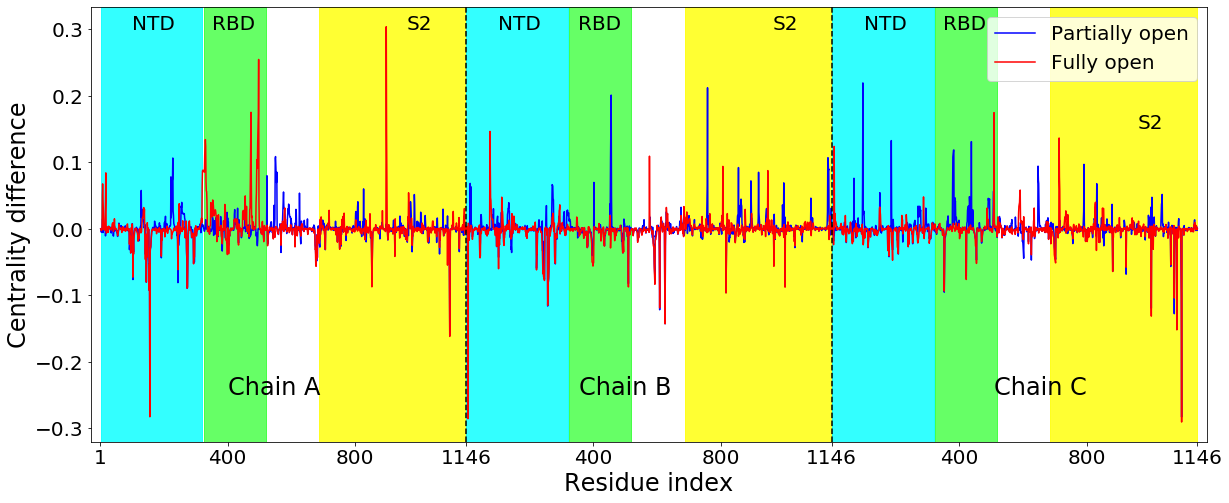

In [7]:
x = np.arange(1,len(dd)+1)
plt.figure(figsize=(20,8))
plt.plot(x,dd,label='Partially open',color='b')
plt.plot(x,dd2,label='Fully open',color='r')
plt.legend(fontsize=20)
plt.xlabel('Residue index',fontsize=24)
plt.ylabel('Centrality difference',fontsize=24)
#plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-30,3468)

plt.axvline(x=1146,c='k',ls='--')
plt.axvline(x=2292,c='k',ls='--')
plt.text(400,-0.25,'Chain A',fontsize=24)
plt.text(1500,-0.25,'Chain B',fontsize=24)
plt.text(2800,-0.25,'Chain C',fontsize=24)

cc = 0

plt.axvspan(1+cc,320+cc,alpha=0.8,color='cyan')
plt.text(100+cc,0.3,'NTD',fontsize=20)
plt.axvspan(324+cc,518+cc,alpha=0.6,color='lime')
plt.text(350+cc,0.3,'RBD',fontsize=20)
plt.axvspan(685+cc,1146+cc,alpha=0.8,color='yellow')
plt.text(960+cc,0.3,'S2',fontsize=20)

cc = 1146

plt.axvspan(1+cc,320+cc,alpha=0.8,color='cyan')
plt.text(100+cc,0.3,'NTD',fontsize=20)
plt.axvspan(324+cc,518+cc,alpha=0.6,color='lime')
plt.text(350+cc,0.3,'RBD',fontsize=20)
plt.axvspan(685+cc,1146+cc,alpha=0.8,color='yellow')
plt.text(960+cc,0.3,'S2',fontsize=20)

cc = 2292

plt.axvspan(1+cc,320+cc,alpha=0.8,color='cyan')
plt.text(100+cc,0.3,'NTD',fontsize=20)
plt.axvspan(324+cc,518+cc,alpha=0.6,color='lime')
plt.text(350+cc,0.3,'RBD',fontsize=20)
plt.axvspan(685+cc,1146+cc,alpha=0.8,color='yellow')
plt.text(960+cc,0.15,'S2',fontsize=20)

xtick_positions = [0,399,799,1146,1545,1945,2292,2691,3091,3437]
xtick_labels = [1,400,800,1146,400,800,1146,400,800,1146]
plt.xticks(xtick_positions,xtick_labels,fontsize=20)

plt.savefig('difference_betweenness_centralty.png',dpi=300,bbox_inches='tight')

In [5]:
diff_part = np.stack((x,dd))
diff_full = np.stack((x,dd2))
diff_full.shape
print(diff_full)

[[ 1.00000000e+00  2.00000000e+00  3.00000000e+00 ...  3.43600000e+03
   3.43700000e+03  3.43800000e+03]
 [ 0.00000000e+00 -1.15575011e-03 -2.56715596e-03 ...  2.61426009e-03
  -1.15575011e-03  0.00000000e+00]]


In [6]:
#diff_part = diff_part.T
sorted_diff_part = diff_part.T[np.argsort(diff_part.T[:, 1])]

f1 = open('sorted_centrality_difference_partially_open.txt','w')
print('#Chain     #Residue   #Centrality_difference_between_partially_open_and_closed_state',file=f1)
for i in range(len(sorted_diff_part)):
    k = int(sorted_diff_part[i,0])
    if k <= 1146:
        res = k
        chain = 'A'
    elif k > 1146 and k <= 2292:
        res = k-1146
        chain = 'B'
    else :
        res = k - 2292
        chain = 'C'
        
    print(chain,res,sorted_diff_part[i,1],file=f1)
f1.close()
        
    

In [7]:
sorted_diff_full = diff_full.T[np.argsort(diff_full.T[:, 1])]

f1 = open('sorted_centrality_difference_fully_open.txt','w')
print('#Chain     #Residue   #Centrality_difference_between_fully_open_and_closed_state',file=f1)
for i in range(len(sorted_diff_full)):
    k = int(sorted_diff_full[i,0])
    if k <= 1146:
        res = k
        chain = 'A'
    elif k > 1146 and k <= 2292:
        res = k-1146
        chain = 'B'
    else :
        res = k - 2292
        chain = 'C'
        
    print(chain,res,sorted_diff_full[i,1],file=f1)
f1.close()